In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pulp

In [3]:
#trade data

rice_trade= pd.read_csv(r"E:\network restructurong\data\aghg\rice_trade_quintal.csv")   #vol quintal 
wheat_trade = pd.read_csv(r"E:\network restructurong\data\aghg\wheat_trade_quintal.csv")
wheat_trade['target'] = wheat_trade['target'].apply(lambda x: x.title())
wheat_trade['source'] = wheat_trade['source'].apply(lambda x: x.title())
rice_trade['target'] = rice_trade['target'].apply(lambda x: x.title())
rice_trade['source'] = rice_trade['source'].apply(lambda x: x.title())
columns_to_remove =  ['ID', 'source_ab', 'target_ab', 'con', 'source_id',
       'target_id','Unnamed: 20']
rice_trade = rice_trade.drop(columns=columns_to_remove)
columns_to_remove =  ['ID', 'con', 'source_id',
       'target_id']
wheat_trade = wheat_trade.drop(columns=columns_to_remove)
wheat_trade['2020']=wheat_trade['2020']*10
wheat_trade['2019']=wheat_trade['2019']*10
rice_trade['2020']=rice_trade['2020']*10
rice_trade['2019']=rice_trade['2019']*10
# Assuming the column labels are strings, convert the integers to strings
start_col = wheat_trade.columns.get_loc('2020')
end_col = wheat_trade.columns.get_loc('2009')

# Compute the average using .iloc
wheat_trade['avg_trade_qtl'] = wheat_trade.iloc[:, start_col:end_col+1].mean(axis=1)
rice_trade['avg_trade_qtl'] = rice_trade.iloc[:, start_col:end_col+1].mean(axis=1)
#df_rice_trade= rice_trade.groupby('source').sum().reset_index()
#df_wheat_trade= wheat_trade.groupby('source').sum().reset_index()

abbri= pd.read_csv(r"E:\crop_switchning\abriviation.csv")

In [4]:
columns_to_remove =  ['2020', '2019', '2015', '2014',
       '2013', '2012', '2011', '2010', '2009','avg_trade_qtl']
df_rice_trade = rice_trade.drop(columns=columns_to_remove)
df_wheat_trade = wheat_trade.drop(columns=columns_to_remove)


In [5]:
# Calculate the average of 2018, 2017, 2016 values and add as a new column
df_rice_trade["avg_trade_qt_2017"] = df_rice_trade[["2018", "2017", "2016"]].mean(axis=1)   # in quintal
df_wheat_trade["avg_trade_qt_2017"] = df_wheat_trade[["2018", "2017", "2016"]].mean(axis=1)


In [7]:
columns_to_remove =  ['2018', '2017', '2016']
df_rice_trade = df_rice_trade.drop(columns=columns_to_remove)
df_wheat_trade = df_wheat_trade.drop(columns=columns_to_remove)

In [8]:
grouped_sum_rice_trade = df_rice_trade.groupby('source')[['avg_trade_qt_2017']].sum().reset_index()


In [9]:
#this data is from 2009(which is written as 2010) to 2019      2019 data is in tonne which is either be converted or deleted  before all are in quintals 
jowar_bajra= pd.read_csv(r"E:\network restructurong\data_set_new\crop\correct_crop_dacnet\jowar_bajra_2009_2019.csv")
millet_maize = pd.read_csv(r"E:\network_nutrient\Sujata\processed_data\maize_millet_2009_2019.csv")

In [10]:
# Create a mapping from state names to their common format.
state_mapping = {
    'Andhra(excluding ports)': 'ANDHRA PRADESH',
    'Andhra(excluding ports) ':'ANDHRA PRADESH',
    'ANDHRA PRADESH & TELANGANA':'TELANGANA',
    'Other ports of Andhra': 'ANDHRA PRADESH',
    'Gujarat(excluding ports)': 'GUJARAT',
    'Other ports of Gujarat': 'GUJARAT',
    'Karnataka(excluding ports': 'KARNATAKA',
    'Other ports of Karnataka': 'KARNATAKA',
    'Kerala(excluding ports)': 'KERALA',
    'Other ports of Kerala': 'KERALA',
    'Maharashtra(excluding ports)': 'MAHARASHTRA',
    'Other ports of Maharashtra': 'MAHARASHTRA',
    'Tamil Nadu(excluding ports)': 'TAMIL NADU',
    'Other ports of Tamil Nadu': 'TAMIL NADU',
    'West Bengal(excluding ports) ': 'WEST BENGAL',
    'Other ports of West Bengal': 'WEST BENGAL',
    'Chattishgarh':'CHATTISGARH','RAJASTHAN':'RAJASHTHAN',
    'Arunachal Pradesh':'ARUNACHAL PRADESH',
    'Assam':'ASSAM', 'Bihar':'BIHAR', 'Chandigarh':'CHANDIGARH', 'Delhi':'DELHI',
       'Goa':'GOA', 'Haryana':'HARYANA', 'Himachal Pradesh':'HIMACHAL PRADESH', 'Jammu':'JAMMU & KASHMIR', 'Jharkhand':'JHARKHAND',
       'Madhya Pradesh':'MADHYA PRADESH', 'Manipur':'MANIPUR', 'Meghalaya':'MEGHALAYA', 'Mizoram':'MIZORAM', 'Nagaland':'NAGALAND',
       'Odisha': 'ODISHA', 'Orissa': 'ODISHA', 'Pondicheri and Karikal':'PUDUCHERRY', 'Puducherry':'PUDUCHERRY',
       'Punjab':'PUNJAB', 'Rajasthan':'RAJASHTHAN', 'Tripura':'TRIPURA', 'Uttar Pradesh':'UTTAR PRADESH', 'Uttaranchal':'UTTARAKHAND'}


#for maize and millet 
filtered_data_millet_maize = millet_maize
filtered_data_millet_maize['Target'] = filtered_data_millet_maize['Target'].replace(state_mapping)
filtered_data_millet_maize['Source'] = filtered_data_millet_maize['Source'].replace(state_mapping)



# Apply the mapping to the 'jowar and bajra 
# Make sure to use .copy() when creating the 'State' column to avoid a SettingWithCopyWarning.
filtered_data_jowar = jowar_bajra
filtered_data_jowar['Target'] = filtered_data_jowar['Target'].replace(state_mapping)
filtered_data_jowar['Source'] = filtered_data_jowar['Source'].replace(state_mapping)

# Now group by the normalized 'State' and 'Year', and sum the 'Quantity'.
grouped_data_jowar = filtered_data_jowar.groupby(['Target','Source', 'year'])['quantity'].sum().reset_index()
grouped_data_millet_maize = filtered_data_millet_maize.groupby(['Target','Source', 'year'])['quantity'].sum().reset_index()

# Now you have the summed data for each state (combining ports and excluding ports) for the years of interest.
#print(grouped_data)


In [11]:
## Define the values to remove
values_to_remove = ['T  O  T  A  L', 'OUTWARD -->', 'OUTWARD TOTAL -->']

# Filter the DataFrame
grouped_data_jowar = grouped_data_jowar[~grouped_data_jowar['Target'].isin(values_to_remove)]
grouped_data_millet_maize = grouped_data_millet_maize[~grouped_data_millet_maize['Target'].isin(values_to_remove)]


In [12]:
## Define the values to remove
values_to_remove = ['nan']

# Filter the DataFrame
grouped_data_jowar = grouped_data_jowar[~grouped_data_jowar['Source'].isin(values_to_remove)]
grouped_data_millet_maize = grouped_data_millet_maize[~grouped_data_millet_maize['Source'].isin(values_to_remove)]


In [13]:
# multiply 2020 value by 10 to convert it in quintal 
import pandas as pd

# Assuming grouped_data_jowar is your DataFrame

# First, ensure that 'year' column is of type int if it's not already
grouped_data_jowar['year'] = grouped_data_jowar['year'].astype(int)

# Locate the rows where the 'year' is 2020 and multiply the 'quantity' column by 10
grouped_data_jowar.loc[grouped_data_jowar['year'] == 2020, 'quantity'] *= 10

# Now the 'quantity' for the year 2020 has been multiplied by 10
grouped_data_jowar.head(10)


,Target,Source,year,quantity
0,ANDAMAN & NICOBAR ISLANDS,ANDAMAN & NICOBAR ISLANDS,2019,0.0
1,ANDAMAN & NICOBAR ISLANDS,ANDAMAN & NICOBAR ISLANDS,2020,0.0
2,ANDAMAN & NICOBAR ISLANDS,ANDHRA PRADESH,2019,0.0
3,ANDAMAN & NICOBAR ISLANDS,ANDHRA PRADESH,2020,0.0
4,ANDAMAN & NICOBAR ISLANDS,ARUNACHAL PRADESH,2019,0.0
5,ANDAMAN & NICOBAR ISLANDS,ARUNACHAL PRADESH,2020,0.0
6,ANDAMAN & NICOBAR ISLANDS,ASSAM,2019,0.0
7,ANDAMAN & NICOBAR ISLANDS,ASSAM,2020,0.0
8,ANDAMAN & NICOBAR ISLANDS,BIHAR,2019,0.0
9,ANDAMAN & NICOBAR ISLANDS,BIHAR,2020,0.0


In [14]:
# multiply 2020 value by 10 to convert it in quintal 
import pandas as pd

# Assuming grouped_data_jowar is your DataFrame

# First, ensure that 'year' column is of type int if it's not already
grouped_data_millet_maize['year'] = grouped_data_millet_maize['year'].astype(int)

# Locate the rows where the 'year' is 2020 and multiply the 'quantity' column by 10
grouped_data_millet_maize.loc[grouped_data_millet_maize['year'] == 2020, 'quantity'] *= 10

# Now the 'quantity' for the year 2020 has been multiplied by 10
grouped_data_millet_maize.head(10)

,Target,Source,year,quantity
0,ANDAMAN & NICOBAR ISLANDS,ANDAMAN & NICOBAR ISLANDS,2019,0.0
1,ANDAMAN & NICOBAR ISLANDS,ANDAMAN & NICOBAR ISLANDS,2020,0.0
2,ANDAMAN & NICOBAR ISLANDS,ANDHRA PRADESH,2019,0.0
3,ANDAMAN & NICOBAR ISLANDS,ANDHRA PRADESH,2020,0.0
4,ANDAMAN & NICOBAR ISLANDS,ARUNACHAL PRADESH,2019,0.0
5,ANDAMAN & NICOBAR ISLANDS,ARUNACHAL PRADESH,2020,0.0
6,ANDAMAN & NICOBAR ISLANDS,ASSAM,2019,0.0
7,ANDAMAN & NICOBAR ISLANDS,ASSAM,2020,0.0
8,ANDAMAN & NICOBAR ISLANDS,BIHAR,2019,0.0
9,ANDAMAN & NICOBAR ISLANDS,BIHAR,2020,0.0


In [15]:
# Assuming 'millet_maize' is your DataFrame
filtered_millet_maize = grouped_data_millet_maize[grouped_data_millet_maize['year'].isin([2016, 2017, 2018])]

# Assuming 'millet_maize' is your DataFrame
filtered_jowar_bajra = grouped_data_jowar[grouped_data_jowar['year'].isin([2016, 2017, 2018])]


In [16]:
#getting mean   # this is mean from 2016, 2017, 2018 #in quintal
# Group by 'year' and calculate the mean 'quantity'
mean_millet_maize_qtl_avg = filtered_millet_maize.groupby(['Target','Source'])['quantity'].mean().reset_index()
mean_millet_jowar_qtl_avg = filtered_jowar_bajra.groupby(['Target','Source'])['quantity'].mean().reset_index()


In [17]:
#converting it in terms of calorie per 100 gm 
    'ragi': 321,
    'bajra': 348,
    'rice': 356,
    'jowar': 334,
    'wheat': 322,
    'maize': 342

IndentationError: unexpected indent (4010998261.py, line 2)

In [18]:
#taking avg of maize and ragi for calorie 
mean_maize_millet_cal= (342+321)/2
mean_bajra_jowar_cal= (334+348)/2

In [19]:
#2016-2018 avg trade of maize and ragi in terms of calorie 
mean_jowar_bajra_cal_avg=  mean_millet_jowar_qtl_avg
mean_jowar_bajra_cal_avg['quantity_kcal']=mean_millet_jowar_qtl_avg['quantity']*341000   # adjusted for quintal

In [20]:
#2016-2018 avg trade of maize and ragi in terms of calorie 
mean_millet_maize_cal_avg=  mean_millet_maize_qtl_avg
mean_millet_maize_cal_avg['quantity_kcal']=mean_millet_maize_qtl_avg['quantity']*331500   # adjusted for quintal

In [38]:
##crop production   foor current scenario
prod_kharif = pd.read_csv(r"E:\network restructurong\data_set_new\crop\correct_crop_dacnet\kharif_df.csv")
prod_rabi = pd.read_csv(r"E:\network restructurong\data_set_new\crop\correct_crop_dacnet\rabi_df.csv")
prod_kharif_2017=prod_kharif[prod_kharif['Year']==2017]
prod_rabi_2017=prod_rabi[prod_rabi['Year']==2017]
#combining 2017 crop production
combined_df_prod_2017 = pd.concat([prod_kharif_2017, prod_rabi_2017], ignore_index=True)
del combined_df_prod_2017['Unnamed: 0']
combined_df_prod_2017_total_prod = combined_df_prod_2017.groupby(['state','crop','Year']).sum().reset_index()
# Drop 'barley' from the 'crop' column
combined_df_prod_2017_total_prod = combined_df_prod_2017_total_prod[combined_df_prod_2017_total_prod['crop'] != 'barley']

# Make everything lowercase
combined_df_prod_2017_total_prod['crop'] = combined_df_prod_2017_total_prod['crop'].str.lower()


In [46]:
#optimized result 
kharif_opt=pd.read_csv(r"E:\crop_switchning\fig2\code_final_cop\kharif_data\nutrient_based_opt_cop_kharif.csv")
rabi_opt=pd.read_csv(r"E:\crop_switchning\fig2\code_final_cop\kharif_data\nitrogen_surplus_rbased_opt_cop_rabi.csv")
del kharif_opt['Unnamed: 0']
del rabi_opt['Unnamed: 0']
combined_df_prod_ = pd.concat([kharif_opt, rabi_opt], ignore_index=True)
combined_df_prod_optimized_total = combined_df_prod_.groupby(['State','Crop']).sum().reset_index()


In [47]:
combined_df_prod_optimized_total

,State,Crop,Optimized Area (Hectare),Original Area (Hectare),Original yield,Optimized production kg,Original production kg,Optimized Total N Applied,Original Total N Applied,Optimized Total P Applied,...,Original AGHG,Optimized N_leach,Original N_leach,Optimized N_emission,Original N_emission,Optimized water,Original water,Optimized profit,Original profit,Area (Hectare)
0,andaman and nicobar,bajra,0.000000e+00,0.00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00
1,andaman and nicobar,jowar,2.277790e-07,0.00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00
2,andaman and nicobar,maize,4.362000e+01,43.62,2112.596091,3.758000e+04,3.758000e+04,5.553060e+03,5.553060e+03,2.036866e+03,...,3.881568e+01,2.766856e+03,2.766856e+03,1.790648e+02,1.790648e+02,1.204145e+05,1.204145e+05,3.124169e+04,3.124169e+04,43.62
3,andaman and nicobar,ragi,0.000000e+00,0.00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00
4,andaman and nicobar,rice,5.340550e+03,5340.55,4720.546319,1.123014e+07,1.123014e+07,6.880247e+05,6.880247e+05,2.591812e+05,...,4.386681e+04,2.954225e+05,2.954225e+05,1.911909e+04,1.911909e+04,3.714587e+07,3.714587e+07,-2.337362e+06,-2.337362e+06,5340.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,west bengal,jowar,0.000000e+00,6.00,500.000000,0.000000e+00,3.000000e+03,0.000000e+00,5.306332e+02,0.000000e+00,...,9.298035e-01,0.000000e+00,2.565611e+02,0.000000e+00,1.884044e+01,0.000000e+00,2.214338e+04,0.000000e+00,1.016506e+04,6.00
188,west bengal,maize,1.058899e+06,245228.00,125899.449262,4.680643e+09,1.423417e+09,1.148420e+08,3.123976e+07,4.158047e+07,...,2.182185e+05,2.993466e+07,7.161608e+06,2.198238e+06,5.259094e+05,2.657650e+09,7.572162e+08,3.351156e+09,1.139744e+09,245228.00
189,west bengal,ragi,3.322800e+04,3379.00,3284.012539,0.000000e+00,3.368000e+06,0.000000e+00,2.724179e+05,0.000000e+00,...,3.331824e+02,0.000000e+00,1.073555e+05,0.000000e+00,7.883604e+03,0.000000e+00,1.024678e+07,0.000000e+00,-6.808726e+07,3379.00
190,west bengal,rice,4.857651e+06,6017427.00,129182.635442,1.418367e+10,1.778353e+10,5.625334e+08,6.991612e+08,2.200189e+08,...,4.942662e+07,2.000303e+08,2.475602e+08,1.468913e+07,1.817947e+07,2.593059e+10,3.270634e+10,-8.810893e+09,-1.104713e+10,5537431.00


In [48]:
state_mapping = {
    'andaman and nicobar': 'Andaman & Nicobar Islands',
    'andhra pradesh': 'Andhra Pradesh',
    'arunachal pradesh': 'Arunachal Pradesh',
    'assam': 'Assam',
    'bihar': 'Bihar',
    'chandigarh': 'Chandigarh',
    'chhattisgarh': 'Chattisgarh',
    'dadra and nagar haveli': 'Dadra & Nagar Haveli',
    'gujarat': 'Gujarat',
    'haryana': 'Haryana',
    'himachal pradesh': 'Himachal Pradesh',
    'jammu and kashmir': 'Jammu & Kashmir',
    'jharkhand': 'Jharkhand',
    'karnataka': 'Karnataka',
    'kerala': 'Kerala',
    'madhya pradesh': 'Madhya Pradesh',
    'maharashtra': 'Maharashtra',
    'manipur': 'Manipur',
    'meghalaya': 'Meghalaya',
    'mizoram': 'Mizoram',
    'nagaland': 'Nagaland',
    'odisha': 'Odisha',
    'puducherry': 'Puducherry',
    'punjab': 'Punjab',
    'rajasthan': 'Rajasthan',
    'sikkim': 'Sikkim',
    'tamil nadu': 'Tamil Nadu',
    'telangana': 'Telangana',
    'tripura': 'Tripura',
    'uttar pradesh': 'Uttar Pradesh',
    'uttarakhand': 'Uttarakhand',
    'west bengal': 'West Bengal'
}
combined_df_prod_optimized_total['State'] = combined_df_prod_optimized_total['State'].map(state_mapping)

In [81]:
combined_df_prod_optimized_total['Crop'].unique()

array(['bajra', 'jowar', 'maize', 'ragi', 'rice', 'wheat'], dtype=object)

In [82]:
selected_columns_crop = combined_df_prod_optimized_total[['State', 'Crop', 'Optimized production kg', 'Original production kg']]

In [83]:
# Rename columns
selected_columns_crop = selected_columns_crop.rename(columns={
    'Optimized production kg': 'opt__prod_kg',
    'Original production kg': 'original_prod_kg'
})

In [84]:
df_rice_prod= selected_columns_crop[selected_columns_crop['Crop'] == 'rice']
df_wheat_prod= selected_columns_crop[selected_columns_crop['Crop'] == 'wheat']
df_jowar_prod= selected_columns_crop[selected_columns_crop['Crop'] == 'jowar']
df_maize_prod= selected_columns_crop[selected_columns_crop['Crop'] == 'maize']
df_ragi_prod= selected_columns_crop[selected_columns_crop['Crop'] == 'ragi']
df_bajra_prod= selected_columns_crop[selected_columns_crop['Crop'] == 'bajra']



In [85]:
columns_to_delete = [ 'Crop']
for column in columns_to_delete:
    del df_rice_prod[column]
    del df_wheat_prod[column]
    del df_jowar_prod[column]
    del df_maize_prod[column]
    del df_ragi_prod[column]
    del df_bajra_prod[column]


In [86]:
df_rice_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 4 to 190
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             32 non-null     object 
 1   opt__prod_kg      32 non-null     float64
 2   original_prod_kg  32 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.0+ KB


In [87]:
df_maize_prod['opt__prod_kcal']=df_maize_prod['opt__prod_kg']*3420
df_maize_prod['original_prod_kg_kcal']=df_maize_prod['original_prod_kg']*3420
df_jowar_prod['opt__prod_kcal']=df_jowar_prod['opt__prod_kg']*3340
df_jowar_prod['original_prod_kg_kcal']=df_jowar_prod['original_prod_kg']*3340
df_ragi_prod['opt__prod_kcal']=df_ragi_prod['opt__prod_kg']*3210
df_ragi_prod['original_prod_kg_kcal']=df_ragi_prod['original_prod_kg']*3210
df_bajra_prod['opt__prod_kcal']=df_bajra_prod['opt__prod_kg']*3480
df_bajra_prod['original_prod_kg_kcal']=df_bajra_prod['original_prod_kg']*3480


C:\Users\shekh\AppData\Local\Temp\ipykernel_31964\3038108460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maize_prod['opt__prod_kcal']=df_maize_prod['opt__prod_kg']*3420
C:\Users\shekh\AppData\Local\Temp\ipykernel_31964\3038108460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_maize_prod['original_prod_kg_kcal']=df_maize_prod['original_prod_kg']*3420
C:\Users\shekh\AppData\Local\Temp\ipykernel_31964\3038108460.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [88]:
df_maize_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 2 to 188
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State                  32 non-null     object 
 1   opt__prod_kg           32 non-null     float64
 2   original_prod_kg       32 non-null     float64
 3   opt__prod_kcal         32 non-null     float64
 4   original_prod_kg_kcal  32 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.5+ KB


In [89]:
# Adding the information from df_bajra_prod and df_maize_prod
# Merge DataFrames based on the 'State' column
merged_df_j_b = df_jowar_prod.merge(df_bajra_prod, on='State', suffixes=('_ragi', '_maize'))

# Add corresponding columns
merged_df_j_b['opt__prod_kg_total'] = merged_df_j_b['opt__prod_kg_ragi'] + merged_df_j_b['opt__prod_kg_maize']
merged_df_j_b['original_prod_kg_total'] = merged_df_j_b['original_prod_kg_ragi'] + merged_df_j_b['original_prod_kg_maize']
merged_df_j_b['opt__prod_kcal_total'] = merged_df_j_b['opt__prod_kcal_ragi'] + merged_df_j_b['opt__prod_kcal_maize']
merged_df_j_b['original_prod_kg_kcal_total'] = merged_df_j_b['original_prod_kg_kcal_ragi'] +merged_df_j_b['original_prod_kg_kcal_maize']
# Drop the old columns
merged_df_j_b.drop(['opt__prod_kg_ragi', 'original_prod_kg_ragi', 'opt__prod_kcal_ragi', 'original_prod_kg_kcal_ragi',
                'opt__prod_kg_maize', 'original_prod_kg_maize', 'opt__prod_kcal_maize', 'original_prod_kg_kcal_maize'],
               axis=1, inplace=True)

In [90]:
# Adding the information from df_ragi_prod and df_maize_prod
# Merge DataFrames based on the 'State' column
merged_df_m_r = df_ragi_prod.merge(df_maize_prod, on='State', suffixes=('_ragi', '_maize'))

# Add corresponding columns
merged_df_m_r['opt__prod_kg_total'] = merged_df_m_r['opt__prod_kg_ragi'] + merged_df_m_r['opt__prod_kg_maize']
merged_df_m_r['original_prod_kg_total'] = merged_df_m_r['original_prod_kg_ragi'] + merged_df_m_r['original_prod_kg_maize']
merged_df_m_r['opt__prod_kcal_total'] = merged_df_m_r['opt__prod_kcal_ragi'] + merged_df_m_r['opt__prod_kcal_maize']
merged_df_m_r['original_prod_kg_kcal_total'] = merged_df_m_r['original_prod_kg_kcal_ragi'] +merged_df_m_r['original_prod_kg_kcal_maize']
# Drop the old columns
merged_df_m_r.drop(['opt__prod_kg_ragi', 'original_prod_kg_ragi', 'opt__prod_kcal_ragi', 'original_prod_kg_kcal_ragi',
                'opt__prod_kg_maize', 'original_prod_kg_maize', 'opt__prod_kcal_maize', 'original_prod_kg_kcal_maize'],
               axis=1, inplace=True) # combined ragi and maize in kcal 

In [91]:
#merging maize millet bajra and jowar merged_df_m_r and merged_df_j_b
merged_df_alt = merged_df_m_r.merge(merged_df_j_b, on='State', suffixes=('_mr', '_jb'))


In [92]:
merged_df_alt['opt__prod_kcal_total_alternate_crop']=merged_df_alt['opt__prod_kcal_total_mr'] + merged_df_alt['opt__prod_kcal_total_jb']
merged_df_alt['original__prod_kcal_total_alternate_crop']=merged_df_alt['original_prod_kg_kcal_total_mr'] + merged_df_alt['original_prod_kg_kcal_total_jb']
# Drop the old columns
merged_df_alt.drop(['opt__prod_kg_total_mr', 'opt__prod_kg_total_mr', 'opt__prod_kcal_total_mr', 'original_prod_kg_kcal_total_mr',
                'opt__prod_kg_total_jb', 'opt__prod_kcal_total_jb', 'original_prod_kg_kcal_total_jb','original_prod_kg_total_jb','original_prod_kg_total_mr'],axis=1, inplace=True) # combined ragi and maize in kcal 

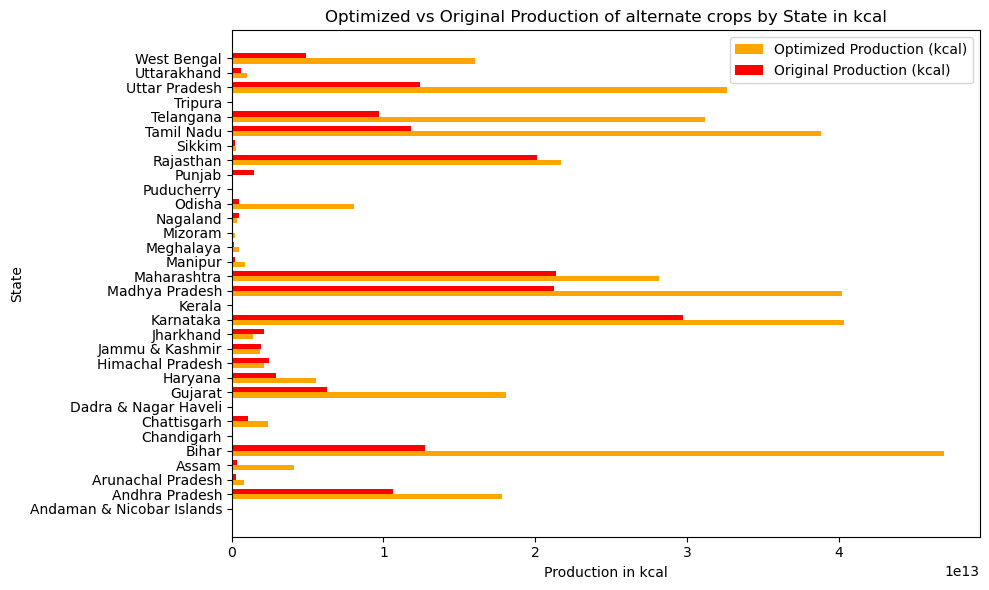

In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df = merged_df_alt

# Setting up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

# Bar width
bar_width = 0.35

# Indices for the bar groups
index = np.arange(len(df))

# Plotting optimized production in kilocalories
bar1 = ax.barh(index - bar_width/2, df['opt__prod_kcal_total_alternate_crop'], bar_width, color='orange', label='Optimized Production (kcal)')

# Plotting original production in kilocalories
bar2 = ax.barh(index + bar_width/2, df['original__prod_kcal_total_alternate_crop'], bar_width, color='red', label='Original Production (kcal)')

# Adding labels and title
ax.set_xlabel('Production in kcal')
ax.set_ylabel('State')
ax.set_yticks(index)
ax.set_yticklabels(df['State'])
ax.set_title('Optimized vs Original Production of alternate crops by State in kcal')

ax.legend(loc='best')

plt.tight_layout()
plt.show()


In [94]:
del mean_millet_maize_cal_avg['quantity']
del mean_jowar_bajra_cal_avg['quantity']

In [95]:
mean_jowar_bajra_cal_avg

,Target,Source,quantity_kcal
0,ANDHRA PRADESH,ANDHRA PRADESH,0.000000e+00
1,ANDHRA PRADESH,ARUNACHAL PRADESH,0.000000e+00
2,ANDHRA PRADESH,ASSAM,0.000000e+00
3,ANDHRA PRADESH,BIHAR,0.000000e+00
4,ANDHRA PRADESH,CHANDIGARH,0.000000e+00
...,...,...,...
1044,WEST BENGAL,TELANGANA,0.000000e+00
1045,WEST BENGAL,TRIPURA,0.000000e+00
1046,WEST BENGAL,UTTAR PRADESH,3.024670e+10
1047,WEST BENGAL,UTTARAKHAND,0.000000e+00


In [98]:
#
# Concatenate the trade maize and ragi , bajra. millet along rows
combined_millet_maize_sor_trade = pd.concat([mean_jowar_bajra_cal_avg, mean_millet_maize_cal_avg], ignore_index=True)
# Sum the 'quantity_kcal' column based on 'Target' and 'Source'
combined_millet_maize_sor_trade_sum = combined_millet_maize_sor_trade.groupby(['Target', 'Source'])['quantity_kcal'].sum().reset_index()


In [99]:
# Mapping dictionary to make the values similar
target_mapping = {'ANDAMAN AND NICOBAR ISLANDS':'Andaman & Nicobar Islands',
    'ANDHRA PRADESH': 'Andhra Pradesh',
    'ARUNACHAL PRADESH': 'Arunachal Pradesh',
    'ASSAM': 'Assam',
    'BIHAR': 'Bihar',
    'CHANDIGARH': 'Chandigarh',
    'CHATTISGARH': 'Chattisgarh',
    'DAMAN & DIU': 'Dadra & Nagar Haveli',
    'DELHI': 'Delhi',
    'GOA': 'Goa',
    'GUJARAT': 'Gujarat',
    'HARYANA': 'Haryana',
    'HIMACHAL PRADESH': 'Himachal Pradesh',
    'JAMMU & KASHMIR': 'Jammu & Kashmir',
    'Jammu and Kasmir': 'Jammu & Kashmir',
    'JHARKHAND': 'Jharkhand',
    'KARNATAKA': 'Karnataka',
    'KERALA': 'Kerala',
    'MADHYA PRADESH': 'Madhya Pradesh',
    'MAHARASHTRA': 'Maharashtra',
    'MANIPUR': 'Manipur',
    'MEGHALAYA': 'Meghalaya',
    'MIZORAM': 'Mizoram',
    'NAGALAND': 'Nagaland',
    'ODISHA': 'Odisha',
    'PUDUCHERRY': 'Puducherry',
    'PUNJAB': 'Punjab',
    'RAJASHTHAN': 'Rajasthan',
    'TAMIL NADU': 'Tamil Nadu',
    'TELANGANA': 'Telangana',
    'TRIPURA': 'Tripura',
    'UTTAR PRADESH': 'Uttar Pradesh',
    'UTTARAKHAND': 'Uttarakhand',
    'WEST BENGAL': 'West Bengal'
}

# Reverse the mapping dictionary
reverse_target_mapping = {v: k for k, v in target_mapping.items()}

# Replace 'State' values in 'merged_df_alt' DataFrame
merged_df_alt['State'] = merged_df_alt['State'].map(reverse_target_mapping)



In [100]:
grouped_sum_mean_maize_millet_trade_cal_avg = combined_millet_maize_sor_trade.groupby('Source')[['quantity_kcal']].sum().reset_index()
grouped_sum_mean_maize_millet_trade_cal_avg

,Source,quantity_kcal
0,ANDHRA PRADESH,3.979349e+11
1,ARUNACHAL PRADESH,0.000000e+00
2,ASSAM,0.000000e+00
3,BIHAR,1.469004e+12
4,CHANDIGARH,0.000000e+00
5,CHATTISGARH,2.339616e+10
6,DAMAN & DIU,0.000000e+00
7,DELHI,2.940405e+09
8,GOA,0.000000e+00
9,GUJARAT,1.937785e+10


In [101]:
# Capitalizing the first letter of each word in the 'Source' column
# Do the same for the 'Source' column in the 'grouped_sum_mean_maize_millet_trade_cal_avg' DataFrame to ensure consistency
grouped_sum_mean_maize_millet_trade_cal_avg['Source'] = grouped_sum_mean_maize_millet_trade_cal_avg['Source'].str.strip().str.upper()
grouped_sum_mean_maize_millet_trade_cal_avg

,Source,quantity_kcal
0,ANDHRA PRADESH,3.979349e+11
1,ARUNACHAL PRADESH,0.000000e+00
2,ASSAM,0.000000e+00
3,BIHAR,1.469004e+12
4,CHANDIGARH,0.000000e+00
5,CHATTISGARH,2.339616e+10
6,DAMAN & DIU,0.000000e+00
7,DELHI,2.940405e+09
8,GOA,0.000000e+00
9,GUJARAT,1.937785e+10


In [102]:
merged_df_alt

,State,opt__prod_kcal_total_alternate_crop,original__prod_kcal_total_alternate_crop
0,ANDAMAN AND NICOBAR ISLANDS,1.285236e+08,1.285236e+08
1,ANDHRA PRADESH,1.779134e+13,1.061144e+13
2,ARUNACHAL PRADESH,8.244613e+11,2.640787e+11
3,ASSAM,4.105365e+12,3.378379e+11
4,BIHAR,4.696771e+13,1.272255e+13
5,CHANDIGARH,0.000000e+00,0.000000e+00
6,CHATTISGARH,2.365804e+12,1.055111e+12
7,DAMAN & DIU,5.325205e+09,5.480680e+09
8,GUJARAT,1.808024e+13,6.255064e+12
9,HARYANA,5.571612e+12,2.920246e+12


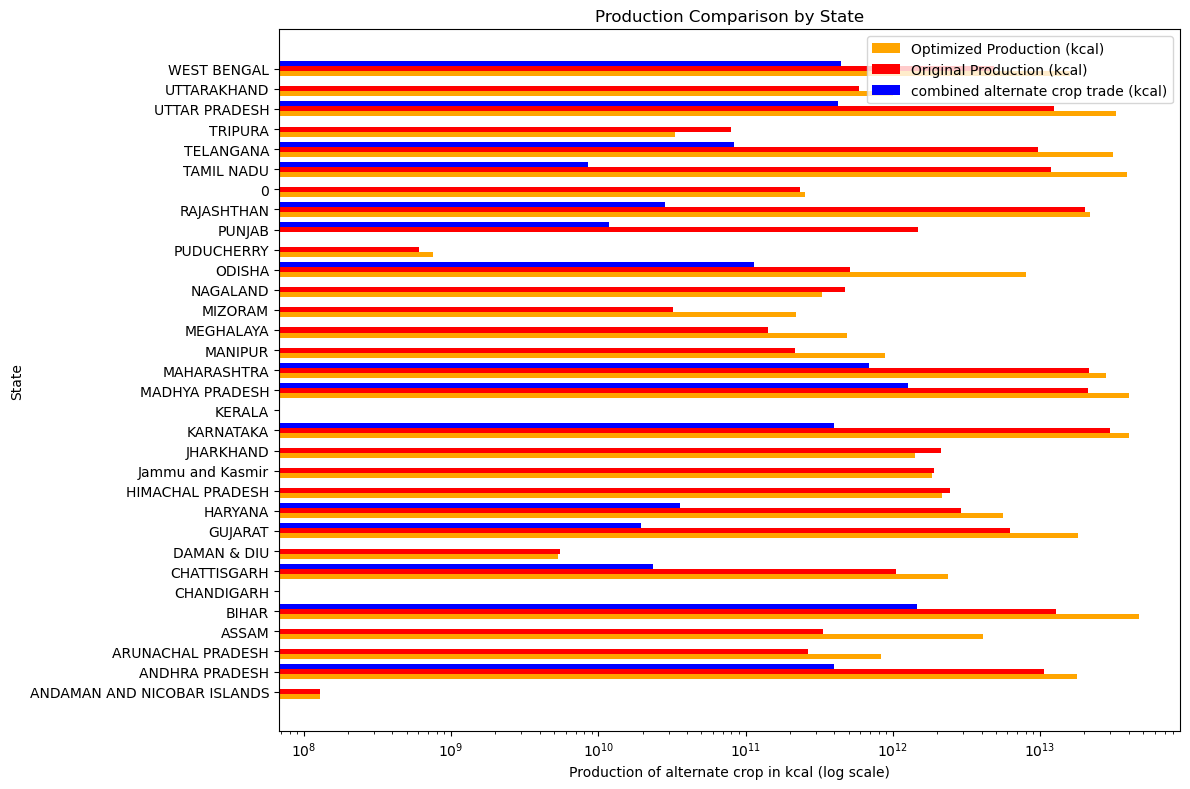

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'merged_df_alt' and 'grouped_sum_mean_jowar_bajra_cal_avg' are already defined and preprocessed

# Capitalizing the first letter of each word in the 'Source' column
#grouped_sum_mean_maize_millet_trade_cal_avg['Source'] = grouped_sum_mean_maize_millet_trade_cal_avg['Source'].str.title()

# Merging the DataFrames on the 'State'/'Source' columns
merged_df = pd.merge(merged_df_alt, grouped_sum_mean_maize_millet_trade_cal_avg, left_on='State', right_on='Source', how='left').fillna(0)

# Setting up the figure and axes for plotting
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

# Bar width
bar_width = 0.25

# Indices for the bar groups
index = np.arange(len(merged_df))

# Ensuring values are positive and non-zero for log scale
merged_df['opt__prod_kcal_total_alternate_crop'] = merged_df['opt__prod_kcal_total_alternate_crop'].replace(0, np.nan)
merged_df['original__prod_kcal_total_alternate_crop'] = merged_df['original__prod_kcal_total_alternate_crop'].replace(0, np.nan)
merged_df['quantity_kcal'] = merged_df['quantity_kcal'].replace(0, np.nan)

# Plotting
bar1 = ax.barh(index - bar_width, merged_df['opt__prod_kcal_total_alternate_crop'], bar_width, color='orange', label='Optimized Production (kcal)')
bar2 = ax.barh(index, merged_df['original__prod_kcal_total_alternate_crop'], bar_width, color='red', label='Original Production (kcal)')
bar3 = ax.barh(index + bar_width, merged_df['quantity_kcal'], bar_width, color='blue', label='combined alternate crop trade (kcal)')

# Adding labels and title
ax.set_xlabel('Production of alternate crop in kcal (log scale)')
ax.set_ylabel('State')
ax.set_yticks(index)
ax.set_yticklabels(merged_df['State'])
ax.set_title('Production Comparison by State')

ax.legend(loc='best')

# Setting the x-axis to logarithmic scale
ax.set_xscale('log')

# Adjust for log scale plotting - Replace NaNs with zeros for display purposes
merged_df.fillna(0, inplace=True)

plt.tight_layout()
plt.show()


In [105]:
#excess alternate crop produced 
merged_df_alt['surplus_alternate']= merged_df_alt['opt__prod_kcal_total_alternate_crop']-merged_df_alt['original__prod_kcal_total_alternate_crop']

In [106]:
merged_df_alt

,State,opt__prod_kcal_total_alternate_crop,original__prod_kcal_total_alternate_crop,surplus_alternate
0,ANDAMAN AND NICOBAR ISLANDS,1.285236e+08,1.285236e+08,0.000000e+00
1,ANDHRA PRADESH,1.779134e+13,1.061144e+13,7.179900e+12
2,ARUNACHAL PRADESH,8.244613e+11,2.640787e+11,5.603826e+11
3,ASSAM,4.105365e+12,3.378379e+11,3.767527e+12
4,BIHAR,4.696771e+13,1.272255e+13,3.424515e+13
5,CHANDIGARH,0.000000e+00,0.000000e+00,0.000000e+00
6,CHATTISGARH,2.365804e+12,1.055111e+12,1.310692e+12
7,DAMAN & DIU,5.325205e+09,5.480680e+09,-1.554751e+08
8,GUJARAT,1.808024e+13,6.255064e+12,1.182517e+13
9,HARYANA,5.571612e+12,2.920246e+12,2.651366e+12


In [107]:
#adding data for trade and produce alternate crop 
merged_df_alternate_kcal = combined_millet_maize_sor_trade.merge(merged_df_alt, left_on='Source', right_on='State', how='outer')
# Drop the last three rows
merged_df_alternate_kcal.drop(merged_df_alternate_kcal.tail(3).index, inplace=True)


In [108]:
merged_df_alternate_kcal['surplus_production_weight']=merged_df_alternate_kcal['opt__prod_kcal_total_alternate_crop']-merged_df_alternate_kcal['original__prod_kcal_total_alternate_crop']

In [109]:
merged_df_rice = df_rice_trade.merge(df_rice_prod, left_on='source', right_on='State', how='outer')
merged_df_wheat = df_wheat_trade.merge(df_wheat_prod, left_on='source', right_on='State', how='outer')


In [110]:
merged_df_wheat.head(5)

,target,source,avg_trade_qt_2017,State,opt__prod_kg,original_prod_kg
0,Andhra Pradesh,Andhra Pradesh,8706.666667,Andhra Pradesh,0.0,27000.0
1,Andaman & Nicobar Islands,Andhra Pradesh,0.000000,Andhra Pradesh,0.0,27000.0
2,Arunachal Pradesh,Andhra Pradesh,0.000000,Andhra Pradesh,0.0,27000.0
3,Assam,Andhra Pradesh,165563.333333,Andhra Pradesh,0.0,27000.0
4,Bihar,Andhra Pradesh,100056.666667,Andhra Pradesh,0.0,27000.0


In [111]:
merged_df_rice['weight_opt_rice_qtl']= merged_df_rice['opt__prod_kg']*(merged_df_rice['avg_trade_qt_2017']/merged_df_rice['original_prod_kg'])
merged_df_wheat['weight_opt_wheat_qtl']= merged_df_wheat['opt__prod_kg']*(merged_df_wheat['avg_trade_qt_2017']/merged_df_wheat['original_prod_kg'])

In [112]:
merged_df_rice['diff_weight_rice_qtl']= merged_df_rice['weight_opt_rice_qtl']-merged_df_rice['avg_trade_qt_2017']
merged_df_wheat['diff_weight_wheat_qtl']= merged_df_wheat['weight_opt_wheat_qtl']-merged_df_wheat['avg_trade_qt_2017']

In [113]:
merged_df_wheat['diff_weight_wheat_kcal']=merged_df_wheat['diff_weight_wheat_qtl']*322000   #converting 100gm to quintal 
merged_df_rice['diff_weight_rice_kcal']=merged_df_rice['diff_weight_rice_qtl']*356000   #converting 100gm to quintal 

In [114]:
# Merge DataFrames based on the common combination of 'target', 'source', and 'State'
merged_df_combined_r_w_diff = merged_df_rice.merge(merged_df_wheat, on=['target', 'source', 'State'], suffixes=('_rice', '_wheat'))

#columns_to_delete = [ 'State', 'opt__prod_kg_x', 'opt__prod_kg_y',
#       'original_prod_kg_y',
#       'original_prod_kg_x',]
#for column in columns_to_delete:
#    del merged_df_combined_r_w_diff[column]


In [115]:
merged_df_combined_r_w_diff['diff_weight_rice_wheat_kcal']=  merged_df_combined_r_w_diff['diff_weight_wheat_kcal']+merged_df_combined_r_w_diff['diff_weight_rice_qtl']
merged_df_combined_r_w_diff['opt_weight_rice_wheat_kcal']=  (merged_df_combined_r_w_diff['weight_opt_wheat_qtl']*322000)+(merged_df_combined_r_w_diff['weight_opt_rice_qtl']*356000)
merged_df_combined_r_w_diff['original_weight_rice_wheat_kcal']=  (merged_df_combined_r_w_diff['avg_trade_qt_2017_wheat']*322000)+(merged_df_combined_r_w_diff['avg_trade_qt_2017_rice']*356000)


In [116]:
grouped_sum_r_w = merged_df_combined_r_w_diff.groupby('source')[['opt_weight_rice_wheat_kcal', 'original_weight_rice_wheat_kcal','diff_weight_rice_wheat_kcal']].sum().reset_index()


In [117]:
grouped_sum_r_w

,source,opt_weight_rice_wheat_kcal,original_weight_rice_wheat_kcal,diff_weight_rice_wheat_kcal
0,Andaman & Nicobar Islands,0.000000e+00,0.000000e+00,0.000000e+00
1,Andhra Pradesh,7.818497e+12,1.108778e+13,-3.152933e+11
2,Arunachal Pradesh,6.365187e+08,1.661139e+09,-2.878146e+03
3,Assam,3.189631e+11,3.096203e+11,2.027813e+09
4,Bihar,2.578954e+11,5.735077e+11,-1.982333e+11
5,Chandigarh,1.558488e+11,1.558488e+11,-1.171429e-06
6,Chattisgarh,7.658717e+12,7.130970e+12,1.178736e+08
7,Dadra & Nagar Haveli,0.000000e+00,0.000000e+00,0.000000e+00
8,Daman & Diu,0.000000e+00,0.000000e+00,0.000000e+00
9,Delhi,0.000000e+00,6.430061e+10,0.000000e+00


In [118]:
grouped_produce_r_w=merged_df_combined_r_w_diff.groupby('State')[['opt__prod_kg_rice', 'original_prod_kg_rice','opt__prod_kg_wheat','original_prod_kg_wheat']].sum().reset_index()

In [119]:
grouped_produce_r_w['opt_prod_rice_wheat_kcal']=  (grouped_produce_r_w['opt__prod_kg_wheat']*3220)+(grouped_produce_r_w['opt__prod_kg_rice']*3560)
grouped_produce_r_w['original_prod_rice_wheat_kcal']=  (grouped_produce_r_w['original_prod_kg_wheat']*3220)+(grouped_produce_r_w['original_prod_kg_rice']*3560)


In [120]:
columns_to_delete = ['opt__prod_kg_rice', 'original_prod_kg_rice','opt__prod_kg_wheat','original_prod_kg_wheat']
for column in columns_to_delete:
    del grouped_produce_r_w[column]


In [121]:
merged_rice_wheat_kcal = pd.merge(grouped_produce_r_w, grouped_sum_r_w, left_on='State', right_on='source', how='left').fillna(0)


In [122]:
merged_rice_wheat_kcal

,State,opt_prod_rice_wheat_kcal,original_prod_rice_wheat_kcal,source,opt_weight_rice_wheat_kcal,original_weight_rice_wheat_kcal,diff_weight_rice_wheat_kcal
0,Andaman & Nicobar Islands,1.439255e+12,1.439255e+12,Andaman & Nicobar Islands,0.000000e+00,0.000000e+00,0.000000e+00
1,Andhra Pradesh,7.870436e+14,1.084409e+15,Andhra Pradesh,7.818497e+12,1.108778e+13,-3.152933e+11
2,Arunachal Pradesh,1.062767e+13,3.080144e+13,Arunachal Pradesh,6.365187e+08,1.661139e+09,-2.878146e+03
3,Assam,6.736926e+14,6.555138e+14,Assam,3.189631e+11,3.096203e+11,2.027813e+09
4,Bihar,7.857176e+14,1.753692e+15,Bihar,2.578954e+11,5.735077e+11,-1.982333e+11
5,Chandigarh,3.044995e+11,3.044995e+11,Chandigarh,1.558488e+11,1.558488e+11,-1.171429e-06
6,Chattisgarh,8.222813e+14,7.657120e+14,Chattisgarh,7.658717e+12,7.130970e+12,1.178736e+08
7,Dadra & Nagar Haveli,3.780946e+12,3.775337e+12,Dadra & Nagar Haveli,0.000000e+00,0.000000e+00,0.000000e+00
8,Gujarat,1.759638e+14,6.016701e+14,Gujarat,6.929916e+10,3.976083e+11,-2.999930e+11
9,Haryana,2.128300e+15,2.106044e+15,Haryana,1.918352e+13,1.946373e+13,9.213919e+11


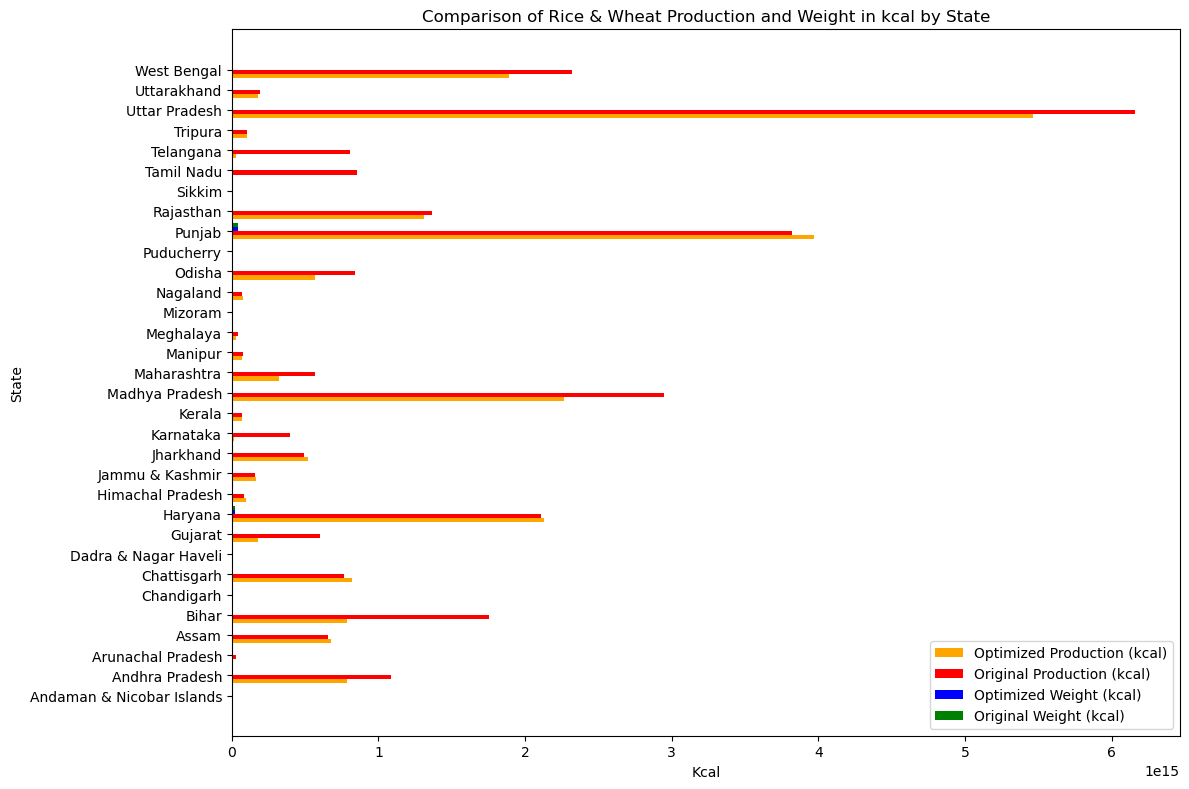

In [123]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



df = merged_rice_wheat_kcal

# Setting up the figure and axes for plotting
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

# Bar width
bar_width = 0.2

# Indices for the bar groups
index = np.arange(len(df))

# Plotting
bar1 = ax.barh(index - bar_width, df['opt_prod_rice_wheat_kcal'], bar_width, color='orange', label='Optimized Production (kcal)')
bar2 = ax.barh(index, df['original_prod_rice_wheat_kcal'], bar_width, color='red', label='Original Production (kcal)')
bar3 = ax.barh(index + bar_width, df['opt_weight_rice_wheat_kcal'], bar_width, color='blue', label='Optimized Weight (kcal)')
bar4 = ax.barh(index + 2*bar_width, df['original_weight_rice_wheat_kcal'], bar_width, color='green', label='Original Weight (kcal)')

# Adding labels and title
ax.set_xlabel('Kcal')
ax.set_ylabel('State')
ax.set_title('Comparison of Rice & Wheat Production and Weight in kcal by State')

# Adding y-ticks for states
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(df['State'])

# Adding a legend
ax.legend()

plt.tight_layout()
plt.show()


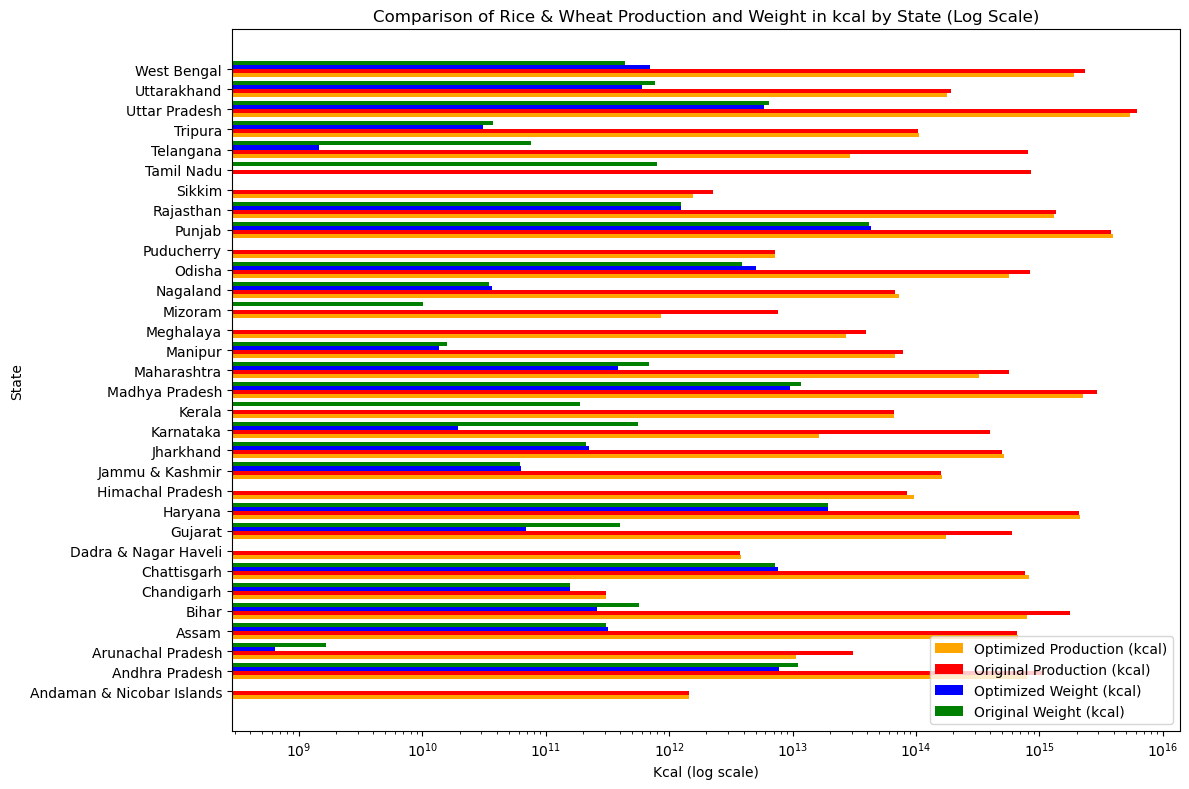

In [124]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming the DataFrame 'df' is already defined as in the previous step

# Setting up the figure and axes for plotting
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

# Bar width
bar_width = 0.2

# Indices for the bar groups
index = np.arange(len(df))

# Plotting with logarithmic scale
bar1 = ax.barh(index - bar_width, df['opt_prod_rice_wheat_kcal'].replace(0, np.nan), bar_width, color='orange', label='Optimized Production (kcal)')
bar2 = ax.barh(index, df['original_prod_rice_wheat_kcal'].replace(0, np.nan), bar_width, color='red', label='Original Production (kcal)')
bar3 = ax.barh(index + bar_width, df['opt_weight_rice_wheat_kcal'].replace(0, np.nan), bar_width, color='blue', label='Optimized Weight (kcal)')
bar4 = ax.barh(index + 2*bar_width, df['original_weight_rice_wheat_kcal'].replace(0, np.nan), bar_width, color='green', label='Original Weight (kcal)')

# Adding labels and title
ax.set_xlabel('Kcal (log scale)')
ax.set_ylabel('State')
ax.set_title('Comparison of Rice & Wheat Production and Weight in kcal by State (Log Scale)')

# Setting the x-axis to logarithmic scale
ax.set_xscale('log')

# Handling zeros by replacing them with NaN. Log(0) is undefined, so zeros are not plotted.
# Note: This step is crucial for avoiding errors due to log(0). Zeros are replaced with NaN before plotting.

# Adding y-ticks for states
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(df['State'])

# Adding a legend
ax.legend()

plt.tight_layout()
plt.show()


In [125]:
merged_df = merged_df[merged_df['Source'] != 0]


In [126]:
merged_df.rename(columns={'quantity_kcal': 'original_trade_altcrop_kcal'}, inplace=True)


In [137]:
merged_df.rename(columns={'surplus_alternate': 'surplus_alternate_generated_kcal'}, inplace=True)


In [139]:
merged_df['surplus_alternate']=merged_df['opt__prod_kcal_total_alternate_crop']-merged_df['original__prod_kcal_total_alternate_crop']

In [140]:
merged_df


,State,opt__prod_kcal_total_alternate_crop,original__prod_kcal_total_alternate_crop,Source,original_trade_altcrop_kcal,surplus_alternate
1,ANDHRA PRADESH,1.779134e+13,1.061144e+13,ANDHRA PRADESH,3.979349e+11,7.179900e+12
2,ARUNACHAL PRADESH,8.244613e+11,2.640787e+11,ARUNACHAL PRADESH,0.000000e+00,5.603826e+11
3,ASSAM,4.105365e+12,3.378379e+11,ASSAM,0.000000e+00,3.767527e+12
4,BIHAR,4.696771e+13,1.272255e+13,BIHAR,1.469004e+12,3.424515e+13
5,CHANDIGARH,0.000000e+00,0.000000e+00,CHANDIGARH,0.000000e+00,0.000000e+00
6,CHATTISGARH,2.365804e+12,1.055111e+12,CHATTISGARH,2.339616e+10,1.310692e+12
7,DAMAN & DIU,5.325205e+09,5.480680e+09,DAMAN & DIU,0.000000e+00,-1.554751e+08
8,GUJARAT,1.808024e+13,6.255064e+12,GUJARAT,1.937785e+10,1.182517e+13
9,HARYANA,5.571612e+12,2.920246e+12,HARYANA,3.612585e+10,2.651366e+12
10,HIMACHAL PRADESH,2.142267e+12,2.438368e+12,HIMACHAL PRADESH,0.000000e+00,-2.961010e+11


In [141]:
merged_rice_wheat_kcal['State'] = merged_rice_wheat_kcal['State'].str.upper()
merged_rice_wheat_kcal

,State,opt_prod_rice_wheat_kcal,original_prod_rice_wheat_kcal,source,opt_weight_rice_wheat_kcal,original_weight_rice_wheat_kcal,diff_weight_rice_wheat_kcal
0,ANDAMAN & NICOBAR ISLANDS,1.439255e+12,1.439255e+12,Andaman & Nicobar Islands,0.000000e+00,0.000000e+00,0.000000e+00
1,ANDHRA PRADESH,7.870436e+14,1.084409e+15,Andhra Pradesh,7.818497e+12,1.108778e+13,-3.152933e+11
2,ARUNACHAL PRADESH,1.062767e+13,3.080144e+13,Arunachal Pradesh,6.365187e+08,1.661139e+09,-2.878146e+03
3,ASSAM,6.736926e+14,6.555138e+14,Assam,3.189631e+11,3.096203e+11,2.027813e+09
4,BIHAR,7.857176e+14,1.753692e+15,Bihar,2.578954e+11,5.735077e+11,-1.982333e+11
5,CHANDIGARH,3.044995e+11,3.044995e+11,Chandigarh,1.558488e+11,1.558488e+11,-1.171429e-06
6,CHATTISGARH,8.222813e+14,7.657120e+14,Chattisgarh,7.658717e+12,7.130970e+12,1.178736e+08
7,DADRA & NAGAR HAVELI,3.780946e+12,3.775337e+12,Dadra & Nagar Haveli,0.000000e+00,0.000000e+00,0.000000e+00
8,GUJARAT,1.759638e+14,6.016701e+14,Gujarat,6.929916e+10,3.976083e+11,-2.999930e+11
9,HARYANA,2.128300e+15,2.106044e+15,Haryana,1.918352e+13,1.946373e+13,9.213919e+11


In [142]:
merged_all_crop_final_kcal = pd.merge(merged_df, merged_rice_wheat_kcal, left_on='State', right_on='State', how='left').fillna(0)


In [143]:
merged_all_crop_final_kcal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   State                                     29 non-null     object 
 1   opt__prod_kcal_total_alternate_crop       29 non-null     float64
 2   original__prod_kcal_total_alternate_crop  29 non-null     float64
 3   Source                                    29 non-null     object 
 4   original_trade_altcrop_kcal               29 non-null     float64
 5   surplus_alternate                         29 non-null     float64
 6   opt_prod_rice_wheat_kcal                  29 non-null     float64
 7   original_prod_rice_wheat_kcal             29 non-null     float64
 8   source                                    29 non-null     object 
 9   opt_weight_rice_wheat_kcal                29 non-null     float64
 10  original_weight_rice_wheat_kcal         

In [144]:
merged_all_crop_final_kcal['trade_demand_new_alt']=merged_all_crop_final_kcal['diff_weight_rice_wheat_kcal']+merged_all_crop_final_kcal['surplus_alternate']+merged_all_crop_final_kcal['original_trade_altcrop_kcal']

In [145]:
merged_all_crop_final_kcal

,State,opt__prod_kcal_total_alternate_crop,original__prod_kcal_total_alternate_crop,Source,original_trade_altcrop_kcal,surplus_alternate,opt_prod_rice_wheat_kcal,original_prod_rice_wheat_kcal,source,opt_weight_rice_wheat_kcal,original_weight_rice_wheat_kcal,diff_weight_rice_wheat_kcal,trade_demand_new_alt
0,ANDHRA PRADESH,1.779134e+13,1.061144e+13,ANDHRA PRADESH,3.979349e+11,7.179900e+12,7.870436e+14,1.084409e+15,Andhra Pradesh,7.818497e+12,1.108778e+13,-3.152933e+11,7.262541e+12
1,ARUNACHAL PRADESH,8.244613e+11,2.640787e+11,ARUNACHAL PRADESH,0.000000e+00,5.603826e+11,1.062767e+13,3.080144e+13,Arunachal Pradesh,6.365187e+08,1.661139e+09,-2.878146e+03,5.603826e+11
2,ASSAM,4.105365e+12,3.378379e+11,ASSAM,0.000000e+00,3.767527e+12,6.736926e+14,6.555138e+14,Assam,3.189631e+11,3.096203e+11,2.027813e+09,3.769555e+12
3,BIHAR,4.696771e+13,1.272255e+13,BIHAR,1.469004e+12,3.424515e+13,7.857176e+14,1.753692e+15,Bihar,2.578954e+11,5.735077e+11,-1.982333e+11,3.551593e+13
4,CHANDIGARH,0.000000e+00,0.000000e+00,CHANDIGARH,0.000000e+00,0.000000e+00,3.044995e+11,3.044995e+11,Chandigarh,1.558488e+11,1.558488e+11,-1.171429e-06,-1.171429e-06
5,CHATTISGARH,2.365804e+12,1.055111e+12,CHATTISGARH,2.339616e+10,1.310692e+12,8.222813e+14,7.657120e+14,Chattisgarh,7.658717e+12,7.130970e+12,1.178736e+08,1.334207e+12
6,DAMAN & DIU,5.325205e+09,5.480680e+09,DAMAN & DIU,0.000000e+00,-1.554751e+08,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,-1.554751e+08
7,GUJARAT,1.808024e+13,6.255064e+12,GUJARAT,1.937785e+10,1.182517e+13,1.759638e+14,6.016701e+14,Gujarat,6.929916e+10,3.976083e+11,-2.999930e+11,1.154456e+13
8,HARYANA,5.571612e+12,2.920246e+12,HARYANA,3.612585e+10,2.651366e+12,2.128300e+15,2.106044e+15,Haryana,1.918352e+13,1.946373e+13,9.213919e+11,3.608884e+12
9,HIMACHAL PRADESH,2.142267e+12,2.438368e+12,HIMACHAL PRADESH,0.000000e+00,-2.961010e+11,9.533828e+13,8.467865e+13,Himachal Pradesh,0.000000e+00,0.000000e+00,0.000000e+00,-2.961010e+11


In [146]:
# Identify rows where original trade 'original_trade_altcrop_kcal' is zero and surplus generated 'surplus_alternate_generated_kcal' is negative
# Create a new column based on conditions
#merged_all_crop_final_kcal['trade_alt_needed'] = np.where((merged_all_crop_final_kcal['original_trade_altcrop_kcal'] == 0) & 
#                                                    (merged_all_crop_final_kcal['surplus_alternate_generated_kcal'] <= 0) & 
#                                                    (merged_all_crop_final_kcal['diff_weight_rice_wheat_kcal'] > 0), 
#                                                    0, 
#                                                    merged_all_crop_final_kcal['trade_demand_new_alt'])

merged_all_crop_final_kcal['trade_alt_needed'] =merged_all_crop_final_kcal['trade_demand_new_alt']

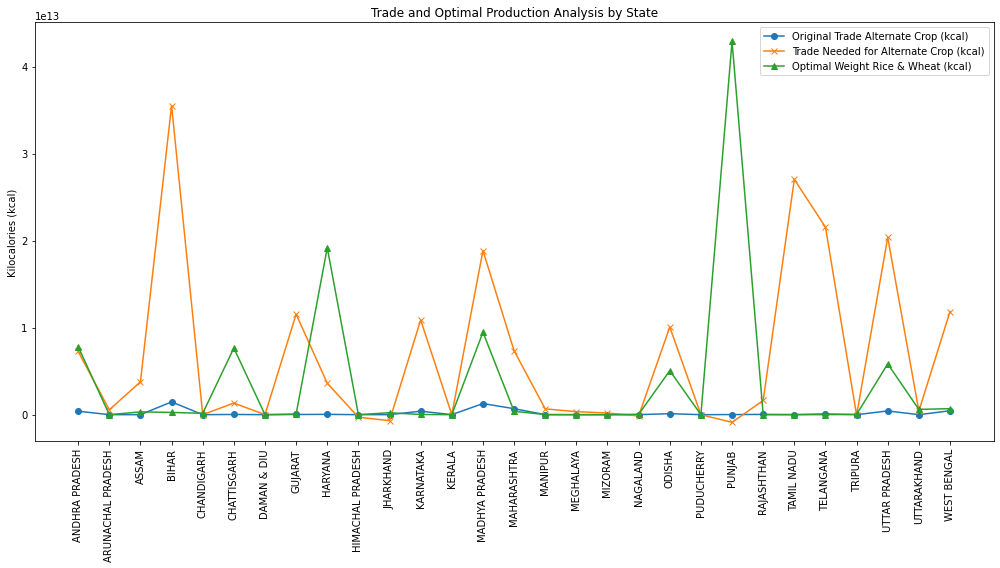

In [147]:
import matplotlib.pyplot as plt

# Setting up the plot
plt.figure(figsize=(14, 8))

# Plotting original trade of alternate crops
plt.plot(merged_all_crop_final_kcal['State'], merged_all_crop_final_kcal['original_trade_altcrop_kcal'], label='Original Trade Alternate Crop (kcal)', marker='o')

# Plotting trade needed for alternate crops
plt.plot(merged_all_crop_final_kcal['State'], merged_all_crop_final_kcal['trade_alt_needed'], label='Trade Needed for Alternate Crop (kcal)', marker='x')

# Plotting optimal weight for rice and wheat
plt.plot(merged_all_crop_final_kcal['State'], merged_all_crop_final_kcal['opt_weight_rice_wheat_kcal'], label='Optimal Weight Rice & Wheat (kcal)', marker='^')

# Improving the plot
plt.xticks(rotation=90)
plt.ylabel('Kilocalories (kcal)')
plt.title('Trade and Optimal Production Analysis by State')
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


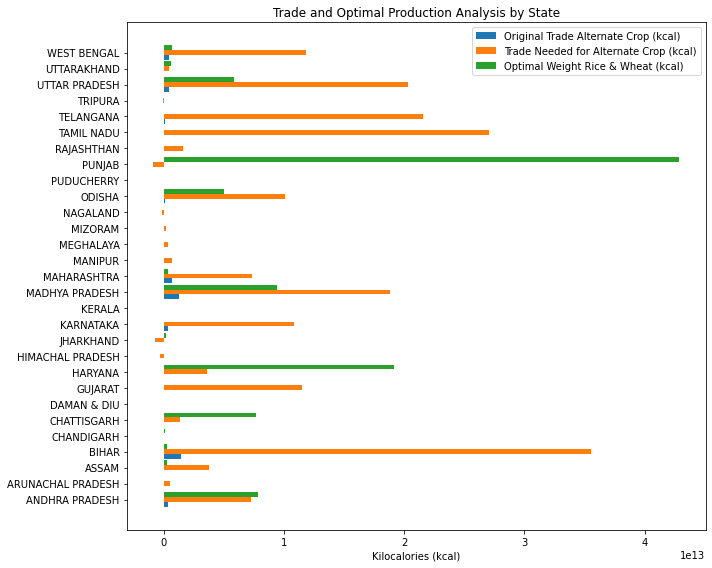

In [148]:
# Setting up the horizontal bar plot
plt.figure(figsize=(10, 8))

# Number of bars
n_bars = len(merged_all_crop_final_kcal)
index = range(n_bars)

# Width of a bar
bar_width = 0.3

# Plotting
plt.barh(index, merged_all_crop_final_kcal['original_trade_altcrop_kcal'], height=bar_width, label='Original Trade Alternate Crop (kcal)')
plt.barh([p + bar_width for p in index], merged_all_crop_final_kcal['trade_alt_needed'], height=bar_width, label='Trade Needed for Alternate Crop (kcal)')
plt.barh([p + 2*bar_width for p in index], merged_all_crop_final_kcal['opt_weight_rice_wheat_kcal'], height=bar_width, label='Optimal Weight Rice & Wheat (kcal)')

# Improving the plot
plt.yticks([p + bar_width for p in index], merged_all_crop_final_kcal['State'])
plt.xlabel('Kilocalories (kcal)')
plt.title('Trade and Optimal Production Analysis by State')
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


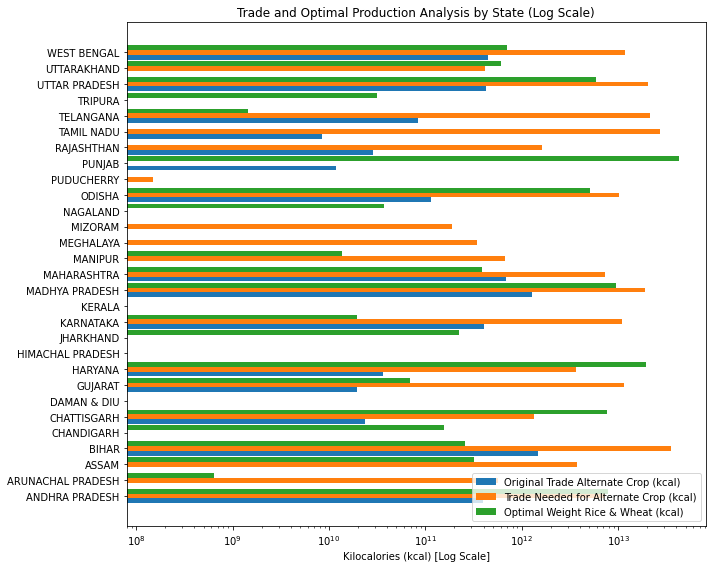

In [149]:
# Adjusting the plot to use a logarithmic scale
plt.figure(figsize=(10, 8))

# Using the same color scheme
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plotting with new colors on a logarithmic scale
plt.barh(index, merged_all_crop_final_kcal['original_trade_altcrop_kcal'], height=bar_width, color=colors[0], label='Original Trade Alternate Crop (kcal)', log=True)
plt.barh([p + bar_width for p in index], merged_all_crop_final_kcal['trade_alt_needed'], height=bar_width, color=colors[1], label='Trade Needed for Alternate Crop (kcal)', log=True)
plt.barh([p + 2*bar_width for p in index], merged_all_crop_final_kcal['opt_weight_rice_wheat_kcal'], height=bar_width, color=colors[2], label='Optimal Weight Rice & Wheat (kcal)', log=True)

# Improving the plot
plt.yticks([p + bar_width for p in index], merged_all_crop_final_kcal['State'])
plt.xlabel('Kilocalories (kcal) [Log Scale]')
plt.title('Trade and Optimal Production Analysis by State (Log Scale)')
plt.legend()
plt.tight_layout()

# Display the plot with the logarithmic scale
plt.show()


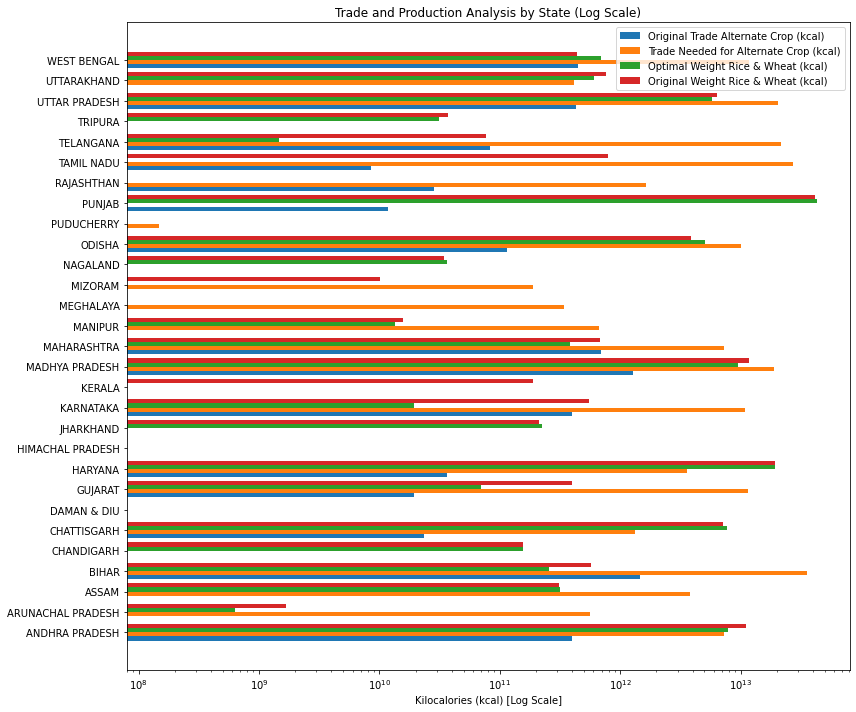

In [150]:
# Adjusting the plot to include 'original_weight_rice_wheat_kcal' on a logarithmic scale
plt.figure(figsize=(12, 10))

# Updating the color scheme to accommodate the new variable
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Adjusting the bar width to fit the new data
bar_width = 0.2

# Plotting with new colors on a logarithmic scale
plt.barh(index, merged_all_crop_final_kcal['original_trade_altcrop_kcal'], height=bar_width, color=colors[0], label='Original Trade Alternate Crop (kcal)', log=True)
plt.barh([p + bar_width for p in index], merged_all_crop_final_kcal['trade_alt_needed'], height=bar_width, color=colors[1], label='Trade Needed for Alternate Crop (kcal)', log=True)
plt.barh([p + 2*bar_width for p in index], merged_all_crop_final_kcal['opt_weight_rice_wheat_kcal'], height=bar_width, color=colors[2], label='Optimal Weight Rice & Wheat (kcal)', log=True)
plt.barh([p + 3*bar_width for p in index], merged_all_crop_final_kcal['original_weight_rice_wheat_kcal'], height=bar_width, color=colors[3], label='Original Weight Rice & Wheat (kcal)', log=True)

# Improving the plot
plt.yticks([p + 1.5*bar_width for p in index], merged_all_crop_final_kcal['State'])
plt.xlabel('Kilocalories (kcal) [Log Scale]')
plt.title('Trade and Production Analysis by State (Log Scale)')
plt.legend()
plt.tight_layout()

# Display the updated plot with the additional data
plt.show()


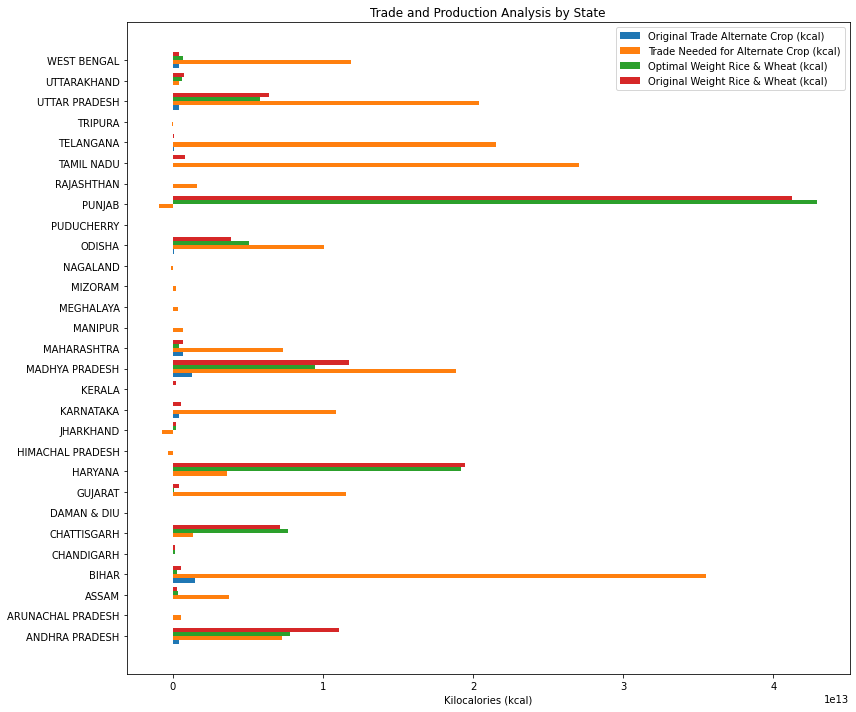

In [151]:
# Adjusting the plot to include 'original_weight_rice_wheat_kcal' on a normal scale
plt.figure(figsize=(12, 10))

# Plotting on a normal scale without logarithmic transformation
plt.barh(index, merged_all_crop_final_kcal['original_trade_altcrop_kcal'], height=bar_width, color=colors[0], label='Original Trade Alternate Crop (kcal)')
plt.barh([p + bar_width for p in index], merged_all_crop_final_kcal['trade_alt_needed'], height=bar_width, color=colors[1], label='Trade Needed for Alternate Crop (kcal)')
plt.barh([p + 2*bar_width for p in index], merged_all_crop_final_kcal['opt_weight_rice_wheat_kcal'], height=bar_width, color=colors[2], label='Optimal Weight Rice & Wheat (kcal)')
plt.barh([p + 3*bar_width for p in index], merged_all_crop_final_kcal['original_weight_rice_wheat_kcal'], height=bar_width, color=colors[3], label='Original Weight Rice & Wheat (kcal)')

# Improving the plot
plt.yticks([p + 1.5*bar_width for p in index], merged_all_crop_final_kcal['State'])
plt.xlabel('Kilocalories (kcal)')
plt.title('Trade and Production Analysis by State')
plt.legend()
plt.tight_layout()

# Display the updated plot with the normal scale
plt.show()


In [153]:
merged_df_optimized_rw_trade

,target,source,avg_trade_qt_2017_rice,State,opt__prod_kg_rice,original_prod_kg_rice,weight_opt_rice_qtl,diff_weight_rice_qtl,diff_weight_rice_kcal,avg_trade_qt_2017_wheat,opt__prod_kg_wheat,original_prod_kg_wheat,weight_opt_wheat_qtl,diff_weight_wheat_qtl,diff_weight_wheat_kcal,diff_weight_rice_wheat_kcal,opt_weight_rice_wheat_kcal,original_weight_rice_wheat_kcal
0,Andhra Pradesh,Andhra Pradesh,1.389573e+06,Andhra Pradesh,6.141102e+09,8.461342e+09,1.008529e+06,-381043.943481,-1.356516e+11,8706.666667,0.000000e+00,27000.0,0.000000,-8706.666667,-2.803547e+09,-2.803928e+09,3.590364e+11,4.974916e+11
1,Andaman & Nicobar Islands,Andhra Pradesh,0.000000e+00,Andhra Pradesh,6.141102e+09,8.461342e+09,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,27000.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,Arunachal Pradesh,Andhra Pradesh,0.000000e+00,Andhra Pradesh,6.141102e+09,8.461342e+09,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,27000.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,Assam,Andhra Pradesh,1.003200e+05,Andhra Pradesh,6.141102e+09,8.461342e+09,7.281060e+04,-27509.403122,-9.793348e+09,165563.333333,0.000000e+00,27000.0,0.000000,-165563.333333,-5.331139e+10,-5.331142e+10,2.592057e+10,8.902531e+10
4,Bihar,Andhra Pradesh,0.000000e+00,Andhra Pradesh,6.141102e+09,8.461342e+09,0.000000e+00,0.000000,0.000000e+00,100056.666667,0.000000e+00,27000.0,0.000000,-100056.666667,-3.221825e+10,-3.221825e+10,0.000000e+00,3.221825e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,Tamil Nadu,West Bengal,0.000000e+00,West Bengal,1.418367e+10,1.778353e+10,0.000000e+00,0.000000,0.000000e+00,70152.666667,6.410620e+08,362744000.0,123977.808076,53825.141409,1.733170e+10,1.733170e+10,3.992085e+10,2.258916e+10
1292,Tripura,West Bengal,0.000000e+00,West Bengal,1.418367e+10,1.778353e+10,0.000000e+00,0.000000,0.000000e+00,0.000000,6.410620e+08,362744000.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1293,Uttarakhand,West Bengal,0.000000e+00,West Bengal,1.418367e+10,1.778353e+10,0.000000e+00,0.000000,0.000000e+00,0.000000,6.410620e+08,362744000.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1294,Uttar Pradesh,West Bengal,0.000000e+00,West Bengal,1.418367e+10,1.778353e+10,0.000000e+00,0.000000,0.000000e+00,8776.000000,6.410620e+08,362744000.0,15509.449539,6733.449539,2.168171e+09,2.168171e+09,4.994043e+09,2.825872e+09


In [154]:
merged_df_optimized_rw_trade= merged_df_combined_r_w_diff
columns_to_drop = ['weight_opt_rice_qtl', 'diff_weight_rice_qtl', 
                   'diff_weight_rice_kcal', 'weight_opt_wheat_qtl', 
                   'diff_weight_wheat_qtl', 'diff_weight_wheat_kcal']

merged_df_optimized_rw_trade.drop(columns_to_drop, axis=1, inplace=True)


In [155]:
merged_df_alternate_kcal.describe()

,quantity_kcal,opt__prod_kcal_total_alternate_crop,original__prod_kcal_total_alternate_crop,surplus_alternate,surplus_production_weight
count,2.098000e+03,1.900000e+03,1.900000e+03,1.900000e+03,1.900000e+03
mean,2.589327e+09,1.236188e+13,5.973532e+12,6.388352e+12,6.388352e+12
std,2.149407e+10,1.537613e+13,8.129796e+12,9.294085e+12,9.294085e+12
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.476108e+12,-1.476108e+12
25%,0.000000e+00,3.292779e+11,2.157678e+11,0.000000e+00,0.000000e+00
50%,0.000000e+00,2.365804e+12,1.476108e+12,1.310692e+12,1.310692e+12
75%,0.000000e+00,2.171517e+13,1.061144e+13,1.059969e+13,1.059969e+13
max,4.764274e+11,4.696771e+13,2.972253e+13,3.424515e+13,3.424515e+13


In [156]:
#getting all the negative diff_weight_rice_wheat_kcal values and keeping its source and target values only 
negative_diff_df = merged_df_optimized_rw_trade[merged_df_optimized_rw_trade['diff_weight_rice_wheat_kcal'] < 0]





In [158]:
negative_diff_df

,target,source,avg_trade_qt_2017_rice,State,opt__prod_kg_rice,original_prod_kg_rice,avg_trade_qt_2017_wheat,opt__prod_kg_wheat,original_prod_kg_wheat,diff_weight_rice_wheat_kcal,opt_weight_rice_wheat_kcal,original_weight_rice_wheat_kcal
0,Andhra Pradesh,Andhra Pradesh,1.389573e+06,Andhra Pradesh,6.141102e+09,8.461342e+09,8.706667e+03,0.000000e+00,2.700000e+04,-2.803928e+09,3.590364e+11,4.974916e+11
3,Assam,Andhra Pradesh,1.003200e+05,Andhra Pradesh,6.141102e+09,8.461342e+09,1.655633e+05,0.000000e+00,2.700000e+04,-5.331142e+10,2.592057e+10,8.902531e+10
4,Bihar,Andhra Pradesh,0.000000e+00,Andhra Pradesh,6.141102e+09,8.461342e+09,1.000567e+05,0.000000e+00,2.700000e+04,-3.221825e+10,0.000000e+00,3.221825e+10
5,Chattisgarh,Andhra Pradesh,1.032113e+05,Andhra Pradesh,6.141102e+09,8.461342e+09,8.860000e+03,0.000000e+00,2.700000e+04,-2.852948e+09,2.666762e+10,3.959614e+10
11,Gujarat,Andhra Pradesh,0.000000e+00,Andhra Pradesh,6.141102e+09,8.461342e+09,8.699667e+02,0.000000e+00,2.700000e+04,-2.801293e+08,0.000000e+00,2.801293e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
1258,Uttar Pradesh,Uttar Pradesh,6.032545e+05,Uttar Pradesh,1.163028e+10,1.558262e+10,2.591988e+06,3.425718e+10,3.589351e+10,-3.804922e+10,9.568589e+11,1.049379e+12
1259,West Bengal,Uttar Pradesh,6.838000e+04,Uttar Pradesh,1.163028e+10,1.558262e+10,5.126900e+05,3.425718e+10,3.589351e+10,-7.526045e+09,1.757291e+11,1.894295e+11
1264,Bihar,West Bengal,1.713000e+04,West Bengal,1.418367e+10,1.778353e+10,0.000000e+00,6.410620e+08,3.627440e+08,-3.467568e+03,4.863826e+09,6.098280e+09
1265,Chattisgarh,West Bengal,3.884483e+04,West Bengal,1.418367e+10,1.778353e+10,0.000000e+00,6.410620e+08,3.627440e+08,-7.863229e+03,1.102945e+10,1.382876e+10


In [157]:
# Group by 'Source' and sum the values
merged_df_optimized_rw_trade_source = merged_df_optimized_rw_trade.groupby('source').sum()

# Reset the index
merged_df_optimized_rw_trade_source.reset_index(inplace=True)


In [159]:
merged_df_optimized_rw_trade_source

,source,avg_trade_qt_2017_rice,opt__prod_kg_rice,original_prod_kg_rice,avg_trade_qt_2017_wheat,opt__prod_kg_wheat,original_prod_kg_wheat,diff_weight_rice_wheat_kcal,opt_weight_rice_wheat_kcal,original_weight_rice_wheat_kcal
0,Andaman & Nicobar Islands,0.000000e+00,4.042850e+08,4.042850e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,Andhra Pradesh,3.025981e+07,2.210797e+11,3.046083e+11,9.791459e+05,0.000000e+00,9.720000e+05,-3.152933e+11,7.818497e+12,1.108778e+13
2,Arunachal Pradesh,4.266333e+03,2.733207e+09,8.399997e+09,4.420000e+02,2.787120e+08,2.787120e+08,-2.878146e+03,6.365187e+08,1.661139e+09
3,Assam,7.429573e+05,1.884005e+11,1.833302e+11,1.401476e+05,9.275760e+08,8.876880e+08,2.027813e+09,3.189631e+11,3.096203e+11
4,Bihar,9.580192e+05,1.910798e+11,2.913538e+11,7.219033e+05,3.275570e+10,2.225069e+11,-1.982333e+11,2.578954e+11,5.735077e+11
5,Chandigarh,3.732600e+05,1.980000e+06,1.980000e+06,7.133000e+04,9.237600e+07,9.237600e+07,-1.171429e-06,1.558488e+11,1.558488e+11
6,Chattisgarh,2.002600e+07,2.259869e+11,2.104143e+11,5.318000e+03,5.517940e+09,5.166756e+09,1.178736e+08,7.658717e+12,7.130970e+12
7,Dadra & Nagar Haveli,0.000000e+00,1.062064e+09,1.060488e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,Daman & Diu,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,Delhi,1.578017e+05,0.000000e+00,0.000000e+00,2.522737e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.430061e+10


In [160]:

# Mapping dictionary for 'State' column
state_mapping = {
    'ANDAMAN AND NICOBAR ISLANDS': 'Andaman & Nicobar Islands',
    'ANDHRA PRADESH': 'Andhra Pradesh',
    'ARUNACHAL PRADESH': 'Arunachal Pradesh',
    'ASSAM': 'Assam',
    'BIHAR': 'Bihar',
    'CHANDIGARH': 'Chandigarh',
    'CHATTISGARH': 'Chattisgarh',
    'DAMAN & DIU': 'Daman & Diu',
    'GUJARAT': 'Gujarat',
    'HARYANA': 'Haryana',
    'HIMACHAL PRADESH': 'Himachal Pradesh',
    'Jammu and Kasmir': 'Jammu & Kashmir', # Correcting the misspelling
    'JHARKHAND': 'Jharkhand',
    'KARNATAKA': 'Karnataka',
    'KERALA': 'Kerala',
    'MADHYA PRADESH': 'Madhya Pradesh',
    'MAHARASHTRA': 'Maharashtra',
    'MANIPUR': 'Manipur',
    'MEGHALAYA': 'Meghalaya',
    'MIZORAM': 'Mizoram',
    'NAGALAND': 'Nagaland',
    'ODISHA': 'Odisha',
    'PUDUCHERRY': 'Puducherry',
    'PUNJAB': 'Punjab',
    'RAJASHTHAN': 'Rajasthan', # Correcting the misspelling
    'TAMIL NADU': 'Tamil Nadu',
    'TELANGANA': 'Telangana',
    'TRIPURA': 'Tripura',
    'UTTAR PRADESH': 'Uttar Pradesh',
    'UTTARAKHAND': 'Uttarakhand',
    'WEST BENGAL': 'West Bengal'
}

# Replace 'State' values in 'merged_df_alt' DataFrame
merged_df_alt['State'] = merged_df_alt['State'].map(state_mapping)


In [161]:
merged_df_optimized_rw_trade_source

,source,avg_trade_qt_2017_rice,opt__prod_kg_rice,original_prod_kg_rice,avg_trade_qt_2017_wheat,opt__prod_kg_wheat,original_prod_kg_wheat,diff_weight_rice_wheat_kcal,opt_weight_rice_wheat_kcal,original_weight_rice_wheat_kcal
0,Andaman & Nicobar Islands,0.000000e+00,4.042850e+08,4.042850e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,Andhra Pradesh,3.025981e+07,2.210797e+11,3.046083e+11,9.791459e+05,0.000000e+00,9.720000e+05,-3.152933e+11,7.818497e+12,1.108778e+13
2,Arunachal Pradesh,4.266333e+03,2.733207e+09,8.399997e+09,4.420000e+02,2.787120e+08,2.787120e+08,-2.878146e+03,6.365187e+08,1.661139e+09
3,Assam,7.429573e+05,1.884005e+11,1.833302e+11,1.401476e+05,9.275760e+08,8.876880e+08,2.027813e+09,3.189631e+11,3.096203e+11
4,Bihar,9.580192e+05,1.910798e+11,2.913538e+11,7.219033e+05,3.275570e+10,2.225069e+11,-1.982333e+11,2.578954e+11,5.735077e+11
5,Chandigarh,3.732600e+05,1.980000e+06,1.980000e+06,7.133000e+04,9.237600e+07,9.237600e+07,-1.171429e-06,1.558488e+11,1.558488e+11
6,Chattisgarh,2.002600e+07,2.259869e+11,2.104143e+11,5.318000e+03,5.517940e+09,5.166756e+09,1.178736e+08,7.658717e+12,7.130970e+12
7,Dadra & Nagar Haveli,0.000000e+00,1.062064e+09,1.060488e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8,Daman & Diu,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,Delhi,1.578017e+05,0.000000e+00,0.000000e+00,2.522737e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.430061e+10
